In [ ]:
!pip install transformers
!pip install diffusers
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 2.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux

**Importaciones**

In [ ]:
from google.colab import drive
from diffusers import DiffusionPipeline
from PIL import Image
import numpy as np
import torch
import os

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
if torch.cuda.is_available():
    device = "cuda"
    print("GPU está disponible y se utilizará para el procesamiento.")
else:
    device = "cpu"
    print("GPU no está disponible. Se utilizará la CPU para el procesamiento.")


GPU no está disponible. Se utilizará la CPU para el procesamiento.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path del modelo guardado desde Google Drive
model_path = "/content/drive/MyDrive/01_Modelo_entrenado"
arte = DiffusionPipeline.from_pretrained(model_path).to(device)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [15]:
!ls /content/drive/MyDrive/01_Modelo_entrenado/input_folder

'tierra (10).jpeg'  'tierra (16).jpeg'	'tierra (3).jpeg'  'tierra (5).jpg'   'tierra (9).jpeg'
'tierra (11).jpeg'  'tierra (1).jpeg'	'tierra (3).jpg'   'tierra (6).jpeg'
'tierra (12).jpeg'  'tierra (1).jpg'	'tierra (4).jpeg'  'tierra (6).jpg'
'tierra (13).jpeg'  'tierra (2).jpeg'	'tierra (4).jpg'   'tierra (7).jpeg'
'tierra (14).jpeg'  'tierra (2).jpg'	'tierra (5).jpeg'  'tierra (8).jpeg'


In [16]:
ruta_carpeta = '/content/drive/MyDrive/01_Modelo_entrenado/input_folder'

In [17]:
def adaptar_imagen(input_image, target_size=(512, 512)):
    # Redimensionar la imagen al tamaño objetivo
    adapted_image = input_image.resize(target_size)
    return adapted_image

In [18]:
archivos_en_carpeta = os.listdir(ruta_carpeta)

In [19]:
archivos_de_imagen = [archivo for archivo in archivos_en_carpeta if archivo.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

In [20]:
for imagen in archivos_de_imagen:
    ruta_imagen = os.path.join(ruta_carpeta, imagen)
    print('Ruta de la imagen:', ruta_imagen)
    imagen = Image.open(ruta_imagen)

Ruta de la imagen: /content/drive/MyDrive/01_Modelo_entrenado/input_folder/tierra (1).jpg
Ruta de la imagen: /content/drive/MyDrive/01_Modelo_entrenado/input_folder/tierra (6).jpg
Ruta de la imagen: /content/drive/MyDrive/01_Modelo_entrenado/input_folder/tierra (2).jpg
Ruta de la imagen: /content/drive/MyDrive/01_Modelo_entrenado/input_folder/tierra (5).jpg
Ruta de la imagen: /content/drive/MyDrive/01_Modelo_entrenado/input_folder/tierra (2).jpeg
Ruta de la imagen: /content/drive/MyDrive/01_Modelo_entrenado/input_folder/tierra (1).jpeg
Ruta de la imagen: /content/drive/MyDrive/01_Modelo_entrenado/input_folder/tierra (16).jpeg
Ruta de la imagen: /content/drive/MyDrive/01_Modelo_entrenado/input_folder/tierra (6).jpeg
Ruta de la imagen: /content/drive/MyDrive/01_Modelo_entrenado/input_folder/tierra (4).jpeg
Ruta de la imagen: /content/drive/MyDrive/01_Modelo_entrenado/input_folder/tierra (3).jpg
Ruta de la imagen: /content/drive/MyDrive/01_Modelo_entrenado/input_folder/tierra (10).jpeg
Ru

In [ ]:
imagen_procesada = arte(imagen)

  0%|          | 0/50 [00:00<?, ?it/s]

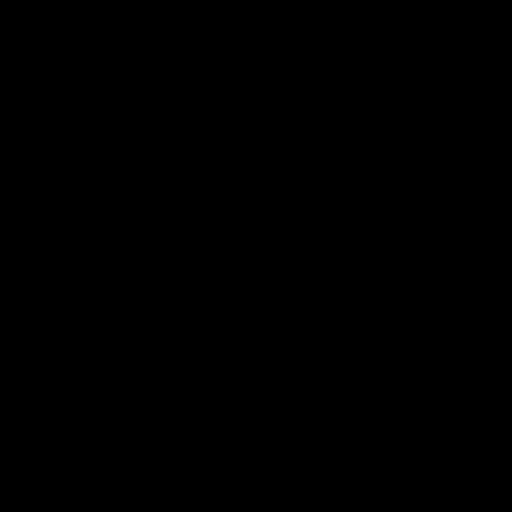

In [ ]:
imagen = imagen_procesada.images[0]
display(imagen)

In [ ]:
# Ruta donde se guardarán las imágenes procesadas
output_folder = "/content/drive/MyDrive/01_Modelo_entrenado/output_folder"
os.makedirs(output_folder, exist_ok=True)

# Guardar la imagen procesada
output_image_path = os.path.join(output_folder, "imagen_procesada.jpg")
imagen.save(output_image_path)
print(f"Imagen procesada guardada en: {output_image_path}")

Imagen procesada guardada en: /content/drive/MyDrive/01_Modelo_entrenado/output_folder/imagen_procesada.jpg
